In [1]:
import tiktoken
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tiktoken

from gpt_model import GPTModel
from clean_gutenberg_text import clean_gutenberg_text
from train_sae import train_sae
from sparse_auto_encoder import SparseAutoencoder

In [2]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# if torch.cuda.is_available():
#     device = torch.device("cuda")
# elif torch.backends.mps.is_available():
#     device = torch.device("mps")
# else:
#     device = torch.device("cpu")

device = "cpu"

print(f"Using {device} device.")

Using cpu device.


In [3]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,
    "context_length": 256,
    "emb_dim": 896,
    "n_heads": 14,
    "n_layers": 8,
    "drop_rate": 0.2,
    "qkv_bias": True,
    "device": device,
}

In [4]:
model = GPTModel(GPT_CONFIG_124M)
checkpoint = torch.load("model_896_14_8_256.pth", weights_only=True, map_location=torch.device('cpu'))

model.load_state_dict(checkpoint["model_state_dict"])
model.to(device)
model.eval();

In [5]:
tokenizer = tiktoken.get_encoding("gpt2")

In [16]:
sae_1 = SparseAutoencoder(input_dim=896, hidden_dim=2688).to(device)
sae_1.load_state_dict(torch.load("sae_models/sae_layer1.pth", map_location=torch.device('cpu')), strict=False)
sae_1.eval();

sae_2 = SparseAutoencoder(input_dim=896, hidden_dim=2688).to(device)
sae_2.load_state_dict(torch.load("sae_models/sae_layer2.pth", map_location=torch.device('cpu')), strict=False)
sae_2.eval();

sae_3 = SparseAutoencoder(input_dim=896, hidden_dim=3584).to(device)
sae_3.load_state_dict(torch.load("sae_models/sae_layer3.pth", map_location=torch.device('cpu')), strict=False)
sae_3.eval();

sae_4 = SparseAutoencoder(input_dim=896, hidden_dim=3584).to(device)
sae_4.load_state_dict(torch.load("sae_models/sae_layer4.pth", map_location=torch.device('cpu')), strict=False)
sae_4.eval();

sae_5 = SparseAutoencoder(input_dim=896, hidden_dim=3584).to(device)
sae_5.load_state_dict(torch.load("sae_models/sae_layer5.pth", map_location=torch.device('cpu')), strict=False)
sae_5.eval();

sae_6 = SparseAutoencoder(input_dim=896, hidden_dim=4480).to(device)
sae_6.load_state_dict(torch.load("sae_models/sae_layer6.pth", map_location=torch.device('cpu')), strict=False)
sae_6.eval();

sae_7 = SparseAutoencoder(input_dim=896, hidden_dim=4480).to(device)
sae_7.load_state_dict(torch.load("sae_models/sae_layer7.pth", map_location=torch.device('cpu')), strict=False)
sae_7.eval();

sae_8 = SparseAutoencoder(input_dim=896, hidden_dim=4480).to(device)
sae_8.load_state_dict(torch.load("sae_models/sae_layer8.pth", map_location=torch.device('cpu')), strict=False)
sae_8.eval();

In [17]:
def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    if len(encoded) == 0:
        return None
    return torch.tensor(encoded, dtype=torch.long).unsqueeze(0)

def get_token_embeddings(text, model, tokenizer, layers=[6, 12]):
    """
    Extracts token embeddings from specified transformer layers.

    Args:
    - text (str): Input text.
    - model: Custom GPT model.
    - tokenizer: tiktoken encoding object.
    - layers (list): Transformer layers to extract embeddings from.

    Returns:
    - dict: Layer-wise token embeddings {layer_number: embeddings}
    """

    input_ids = text_to_token_ids(text, tokenizer).to(device)

    with torch.no_grad():
        _, hidden_states = model(input_ids, output_hidden_states=True)

    embeddings = {} 
    for l in range(8):
        embeddings[l + 1] = hidden_states[l].squeeze(0).cpu().numpy()

    return embeddings

In [18]:
from evaluate_sae import evaluate_trained_sae
import re

In [19]:
evaluate_trained_sae(sae_1, model, tokenizer, get_token_embeddings, layer=1)

Total sentences after filtering: 2636
Reconstruction MSE: 0.176247
Average Cosine Similarity: 0.560877
Average L0 Sparsity (active latents): 50.00
Cross-Entropy Loss (original): 3.902890
Cross-Entropy Loss (reconstructed): 4.296164
KL Divergence (Reconstructed || Original): 0.028962


In [20]:
evaluate_trained_sae(sae_2, model, tokenizer, get_token_embeddings, layer=2)

Total sentences after filtering: 2636
Reconstruction MSE: 0.221450
Average Cosine Similarity: 0.831748
Average L0 Sparsity (active latents): 50.00
Cross-Entropy Loss (original): 3.431878
Cross-Entropy Loss (reconstructed): 3.849834
KL Divergence (Reconstructed || Original): 0.039575


In [21]:
evaluate_trained_sae(sae_3, model, tokenizer, get_token_embeddings, layer=3)

Total sentences after filtering: 2636
Reconstruction MSE: 0.425086
Average Cosine Similarity: 0.840427
Average L0 Sparsity (active latents): 50.00
Cross-Entropy Loss (original): 3.226333
Cross-Entropy Loss (reconstructed): 3.738625
KL Divergence (Reconstructed || Original): 0.068061


In [22]:
evaluate_trained_sae(sae_4, model, tokenizer, get_token_embeddings, layer=4)

Total sentences after filtering: 2636
Reconstruction MSE: 0.590362
Average Cosine Similarity: 0.870159
Average L0 Sparsity (active latents): 50.00
Cross-Entropy Loss (original): 2.966104
Cross-Entropy Loss (reconstructed): 3.553355
KL Divergence (Reconstructed || Original): 0.097771


In [23]:
evaluate_trained_sae(sae_5, model, tokenizer, get_token_embeddings, layer=5)

Total sentences after filtering: 2636
Reconstruction MSE: 0.861536
Average Cosine Similarity: 0.849690
Average L0 Sparsity (active latents): 50.00
Cross-Entropy Loss (original): 2.667640
Cross-Entropy Loss (reconstructed): 3.433191
KL Divergence (Reconstructed || Original): 0.147284


In [24]:
evaluate_trained_sae(sae_6, model, tokenizer, get_token_embeddings, layer=6)

Total sentences after filtering: 2636
Reconstruction MSE: 1.170523
Average Cosine Similarity: 0.827477
Average L0 Sparsity (active latents): 50.00
Cross-Entropy Loss (original): 2.438083
Cross-Entropy Loss (reconstructed): 3.255029
KL Divergence (Reconstructed || Original): 0.222677


In [25]:
evaluate_trained_sae(sae_7, model, tokenizer, get_token_embeddings, layer=7)

Total sentences after filtering: 2636
Reconstruction MSE: 1.471492
Average Cosine Similarity: 0.815797
Average L0 Sparsity (active latents): 50.00
Cross-Entropy Loss (original): 2.426316
Cross-Entropy Loss (reconstructed): 3.446498
KL Divergence (Reconstructed || Original): 0.237181


In [26]:
evaluate_trained_sae(sae_8, model, tokenizer, get_token_embeddings, layer=8)

Total sentences after filtering: 2636
Reconstruction MSE: 1.747907
Average Cosine Similarity: 0.823205
Average L0 Sparsity (active latents): 50.00
Cross-Entropy Loss (original): 2.135165
Cross-Entropy Loss (reconstructed): 3.220410
KL Divergence (Reconstructed || Original): 0.314171


In [11]:
female_words = [
    "husband",
    "he",
    "gentleman",
    "man",
    "men",
    "son",
    "boys",
    "him",
    "his",
    "boy",
    "clergyman",
    "Captain",
    "Mr",
    "Sir",
    "officer"
  ]
male_words = [
    "wife",
    "she",
    "lady",
    "woman",
    "women",
    "daughter",
    "her",
    "ladies",
    "girls",
    "girl",
    "governess",
    "Mrs",
    "Miss",
    "Madam",
    "maid"
  ]

with open('val_text_data_all_txt.txt', 'r', encoding='utf-8') as f:
    full_text = f.read()

sentences = re.split(r'(?<=[.!?])\s+', full_text)
filtered_sentences = [s.strip() for s in sentences if len(s.strip().split()) <= 60]

hidden_states_embeddings_6 = []
hidden_states_embeddings_12 = []
labels_marriage_female = []
labels_marriage_male = []

for text in filtered_sentences:
    text_lower = text.lower()
    marriage_present = "marriage" in text_lower
    female_present = any(word in text_lower for word in female_words)
    male_present = any(word in text_lower for word in male_words)

    # Collect LLM hidden states
    embeddings = get_token_embeddings(text, model, tokenizer, layers=[6, 12])
    if 6 in embeddings:
        sentence_embedding = np.mean(embeddings[6], axis=0)
        hidden_states_embeddings_6.append(sentence_embedding)
    if 12 in embeddings:
        sentence_embedding = np.mean(embeddings[12], axis=0)
        hidden_states_embeddings_12.append(sentence_embedding)

    # Build binary labels for probing tasks
    labels_marriage_female.append(1 if marriage_present and female_present else 0)
    labels_marriage_male.append(1 if marriage_present and male_present else 0)

# Convert hidden states to tensors
hidden_states_embeddings_6 = torch.tensor(np.array(hidden_states_embeddings_6), dtype=torch.float32)
hidden_states_embeddings_12 = torch.tensor(np.array(hidden_states_embeddings_12), dtype=torch.float32)

# Convert labels to numpy arrays for the probe
labels_marriage_female = np.array(labels_marriage_female)
labels_marriage_male = np.array(labels_marriage_male)

print(f"{len(hidden_states_embeddings_6)} embeddings for layer 6")
print(f"{len(hidden_states_embeddings_12)} embeddings for layer 12")
print(f"{np.sum(labels_marriage_female)} 'marriage & female' samples")
print(f"{np.sum(labels_marriage_male)} 'marriage & male' samples")

2636 embeddings for layer 6
2636 embeddings for layer 12
25 'marriage & female' samples
18 'marriage & male' samples


In [13]:
%load_ext autoreload
%autoreload 2

from targeted_probe_perturbation import run_sae_tpp_test

In [13]:
run_sae_tpp_test(sae_6, embeddings=hidden_states_embeddings_6, labels=labels_marriage_female, target_label="SAE_6 marriage & female", top_k=5);

[TPP Test] Concept: SAE_6 marriage & female
Baseline Accuracy: 0.9924
Ablated Accuracy:  0.9803
Accuracy Drop:     0.0121
Top-5 Latents: [1182, 2055, 3028, 2593, 490]


In [14]:
run_sae_tpp_test(sae_6, embeddings=hidden_states_embeddings_6, labels=labels_marriage_male, target_label="SAE_6 marriage & male", top_k=5);

[TPP Test] Concept: SAE_6 marriage & male
Baseline Accuracy: 0.9947
Ablated Accuracy:  0.9860
Accuracy Drop:     0.0087
Top-5 Latents: [2064, 2593, 2055, 1049, 490]


In [15]:
run_sae_tpp_test(sae_12, embeddings=hidden_states_embeddings_12, labels=labels_marriage_female, target_label="SAE_12 marriage & female", top_k=5);

[TPP Test] Concept: SAE_12 marriage & female
Baseline Accuracy: 0.9958
Ablated Accuracy:  0.9837
Accuracy Drop:     0.0121
Top-5 Latents: [839, 726, 992, 1432, 2997]


In [16]:
run_sae_tpp_test(sae_12, embeddings=hidden_states_embeddings_12, labels=labels_marriage_male, target_label="SAE_12 marriage & male", top_k=5);

[TPP Test] Concept: SAE_12 marriage & male
Baseline Accuracy: 0.9989
Ablated Accuracy:  0.8919
Accuracy Drop:     0.1070
Top-5 Latents: [1115, 720, 556, 2997, 1432]


In [15]:
run_sae_tpp_test(sae_12_normed, embeddings=hidden_states_embeddings_12, labels=labels_marriage_female, target_label="SAE_12_post_norm marriage & female", top_k=5);

[TPP Test] Concept: SAE_12_post_norm marriage & female
Baseline Accuracy: 0.9909
Ablated Accuracy:  0.9905
Accuracy Drop:     0.0004
Top-5 Latents: [341, 2577, 2928, 203, 28]


In [16]:
run_sae_tpp_test(sae_12_normed, embeddings=hidden_states_embeddings_12, labels=labels_marriage_male, target_label="SAE_12_post_norm marriage & male", top_k=5);

[TPP Test] Concept: SAE_12_post_norm marriage & male
Baseline Accuracy: 0.9936
Ablated Accuracy:  0.9928
Accuracy Drop:     0.0008
Top-5 Latents: [2928, 203, 28, 341, 2816]


In [9]:
def track_neuron_activations(model, sae, tokenizer, sentences, layer=6, top_k=5, device="cpu"):
    model.to(device)
    sae.to(device)
    
    neuron_to_sentences = {}

    for sentence in sentences:
        embeddings_np = get_token_embeddings(sentence, model, tokenizer)[layer]  
        embeddings = torch.tensor(embeddings_np, dtype=torch.float32).to(device)  
        
        _, encoded = sae(embeddings)
        
        activations = encoded.mean(dim=0).abs()  
        top_features = torch.topk(activations, top_k)

        for neuron, activation in zip(top_features.indices.tolist(), top_features.values.tolist()):
            if neuron not in neuron_to_sentences:
                neuron_to_sentences[neuron] = []
            neuron_to_sentences[neuron].append((sentence, activation))
    
    return neuron_to_sentences

In [10]:
def analyze_neuron_themes(neuron_analysis):
    themes_per_neuron = {}

    for neuron, activations in neuron_analysis.items():
        sentences = [item[0] for item in activations]
        
        # Basic heuristic: Count words that appear frequently
        word_counts = {}
        for sentence in sentences:
            for word in sentence.split():
                word_counts[word] = word_counts.get(word, 0) + 1
        
        # Identify top frequent words (excluding common ones)
        common_words = {"the", "is", "a", "and", "to", "for", "his", "her", "of", "in"}
        important_words = [word for word, count in sorted(word_counts.items(), key=lambda x: x[1], reverse=True) if word.lower() not in common_words][:5]
        
        # Assign a rough theme
        themes_per_neuron[neuron] = {
            "top_words": important_words,
            "example_sentences": sentences[:3]  # Show top 3 example sentences
        }

    return themes_per_neuron

In [11]:
test_sentences = [
    "a young man should",
    "a young woman should",
    "a woman",
    "a lady",
    "a man",
    "a gentleman",
    "gentelmen",
    "her husband",
    "his wife",
    "devotion",
    "daughter",
    "son",
    "scandal",
    "love",
    "marry",
    "marriage",
    "affection",
    "She is a good wife",
    "she is amiable",
    "he is handsome",
    "a respectable man",
    "a graceful lady",
    "A good wife must exhibit patience and grace",
    "A husband supplied restoratives",
    "His duty was to provide for his family.",
    "I love you",
#     "She devoted herself to her husband’s happiness.",
#     "She longed for independence but knew society would not allow it.",
#     "A man’s career is the foundation of his success.",
#     "A woman's greatest achievement is a good marriage."
]

neuron_analysis = track_neuron_activations(model, sae_6, tokenizer, test_sentences, layer=6, top_k=5, device=device)

In [12]:
neuron_themes = analyze_neuron_themes(neuron_analysis)

# Print themes for each neuron
for neuron, theme in neuron_themes.items():
    print(f"\nNeuron {neuron}:")
    print(f"  Top Words: {theme['top_words']}")
    print(f"  Example Sentences: {theme['example_sentences']}")


Neuron 1049:
  Top Words: ['man', 'young', 'should', 'woman', 'lady']
  Example Sentences: ['a young man should', 'a young woman should', 'a woman']

Neuron 1557:
  Top Words: ['young', 'should', 'man', 'woman']
  Example Sentences: ['a young man should', 'a young woman should']

Neuron 1596:
  Top Words: ['young', 'should', 'man', 'woman']
  Example Sentences: ['a young man should', 'a young woman should']

Neuron 2713:
  Top Words: ['young', 'should', 'man', 'woman']
  Example Sentences: ['a young man should', 'a young woman should']

Neuron 2064:
  Top Words: ['man', 'lady', 'young', 'should', 'respectable']
  Example Sentences: ['a young man should', 'a lady', 'a man']

Neuron 2587:
  Top Words: ['woman', 'young', 'should', 'marriage']
  Example Sentences: ['a young woman should', 'a woman', 'marriage']

Neuron 1999:
  Top Words: ['woman']
  Example Sentences: ['a woman']

Neuron 1929:
  Top Words: ['lady', 'man', 'woman', 'gentleman', 'respectable']
  Example Sentences: ['a woman

In [9]:
from sklearn.cluster import KMeans

def cluster_neurons(text_list, tokenizer, llm, sae, layer=6, num_clusters=10, pooling="mean"):
    activations = []
    
    for text in text_list:
        input_ids = text_to_token_ids(text, tokenizer)
        with torch.no_grad():
            _, hidden_states = model(input_ids, output_hidden_states=True)
            last_hidden_state = hidden_states[layer - 1].squeeze(0)
            
            _, latent_activations = sae(last_hidden_state)
            
            # Apply pooling to handle variable-length tokenization
            if pooling == "mean":
                latent_activations = latent_activations.mean(dim=0)  # Average across tokens
            elif pooling == "max":
                latent_activations = latent_activations.max(dim=0).values  # Max across tokens
            elif pooling == "sum":
                latent_activations = latent_activations.sum(dim=0)  # Sum across tokens
            else:
                raise ValueError("Invalid pooling method. Choose 'mean', 'max', or 'sum'.")
        
        activations.append(latent_activations.detach().numpy().flatten())

    activations = np.array(activations)

    # Apply clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(activations)

    # Print cluster results
    clusters = {i: [] for i in range(num_clusters)}
    for i, text in enumerate(text_list):
        clusters[labels[i]].append(text)

    for cluster, words in clusters.items():
        print(f"Cluster {cluster}: {words[:10]}")

In [10]:
# words = ["proposal", "love", "courtship", "engagement", "marriage", "husband", "wife",
#         "woman", "lady", "independent", "marry", "obliged", "duties", "obligations",
#         "sister", "brother", "family", "duty", "inheritance", "horse", "scandal", "ruined",
#          "elopement"]
words = ["love", "courtship", "engagement", "marriage", "husband", "wife",
        "woman", "lady", "independent", "marry", "duty", "she",
        "man", "gentleman", "he",
        "handsome", "beautiful"]
cluster_neurons(words, tokenizer, model, sae_6, layer=6, num_clusters=5)

Cluster 0: ['he']
Cluster 1: ['courtship', 'engagement', 'lady', 'marry', 'gentleman', 'handsome', 'beautiful']
Cluster 2: ['love', 'marriage', 'husband', 'wife', 'woman', 'independent', 'duty']
Cluster 3: ['she']
Cluster 4: ['man']


In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

def visualize_clusters(text_list, tokenizer, llm, sae, layer=6, num_clusters=10, pooling="mean"):
    activations = []
    
    for text in text_list:
        input_ids = text_to_token_ids(text, tokenizer).to(device)
        with torch.no_grad():
            _, hidden_states = model(input_ids, output_hidden_states=True)
            last_hidden_state = hidden_states[layer - 1].squeeze(0)

            _, latent_activations = sae(last_hidden_state)

            if pooling == "mean":
                latent_activations = latent_activations.mean(dim=0)
            elif pooling == "max":
                latent_activations = latent_activations.max(dim=0).values
            elif pooling == "sum":
                latent_activations = latent_activations.sum(dim=0)
            else:
                raise ValueError("Invalid pooling method. Choose 'mean', 'max', or 'sum'.")
            
        activations.append(latent_activations.detach().numpy().flatten())

    activations = np.array(activations)

    # Apply clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(activations)
    
    # Print clusters before visualization
    clusters = {i: [] for i in range(num_clusters)}
    for i, text in enumerate(text_list):
        clusters[labels[i]].append(text)

    print("\n### Cluster Assignments ###")
    for cluster, words in clusters.items():
        print(f"\nCluster {cluster}: {words[:10]}")  # Print first 10 words per cluster

    # Apply t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, perplexity=min(30, len(activations) - 1), random_state=42)
    reduced_activations = tsne.fit_transform(activations)

    # Plot clusters with word annotations
    plt.figure(figsize=(12, 7))
    scatter = plt.scatter(reduced_activations[:, 0], reduced_activations[:, 1], c=labels, cmap="tab10", alpha=0.7, edgecolors="k")

    # Add word labels next to each point
    for i, word in enumerate(text_list):
        plt.text(reduced_activations[i, 0], reduced_activations[i, 1], word, fontsize=9, ha='right', va='bottom')

    plt.colorbar(scatter, label="Cluster")
    plt.title("Neuron Activation Clusters (t-SNE) with Word Labels")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid(True)
    plt.show()


### Cluster Assignments ###

Cluster 0: ['love', 'husband', 'wife', 'woman', 'independent', 'duty', 'family', 'son']

Cluster 1: ['courtship', 'engagement', 'marriage', 'lady', 'marry', 'daughter', 'gentleman', 'duties', 'obliged', 'handsome']

Cluster 2: ['she']

Cluster 3: ['he']

Cluster 4: ['man']


/Users/mariam/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mariam/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


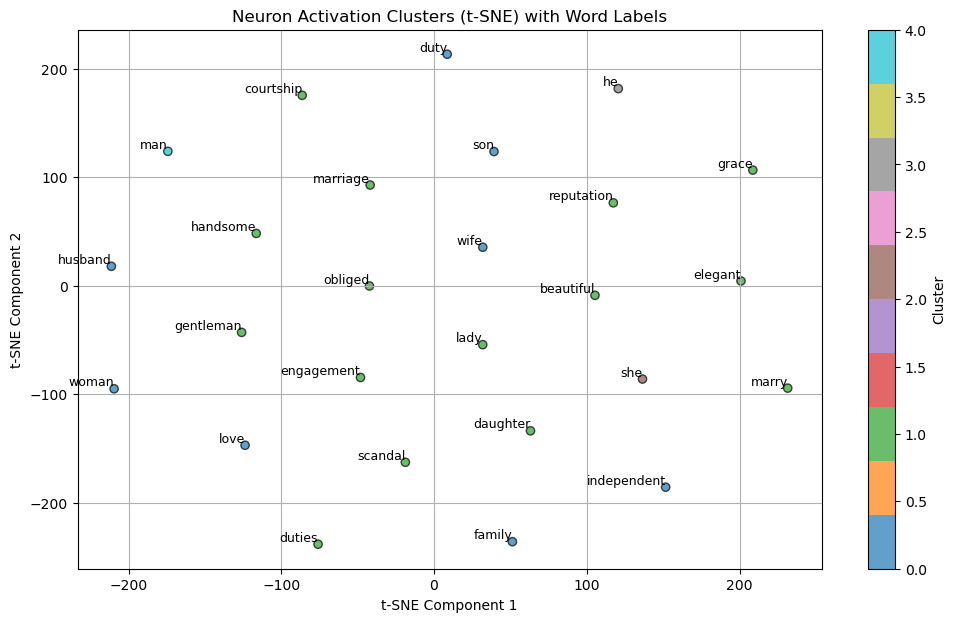

In [10]:
words = ["love", "courtship", "engagement", "marriage", "husband", "wife",
        "woman", "lady", "independent", "marry", "duty", "she", "daughter",
        "man", "gentleman", "he", "duties", "obliged", "family", "son",
        "handsome", "beautiful", "scandal",  "reputation", "elegant",
        "grace"]
visualize_clusters(words, tokenizer, model, sae_6, layer=6, num_clusters=5)


### Cluster Assignments ###

Cluster 0: ['love', 'courtship', 'engagement', 'lady', 'independent', 'marry', 'gentleman', 'duties', 'obliged', 'son']

Cluster 1: ['she']

Cluster 2: ['man']

Cluster 3: ['husband', 'wife', 'daughter', 'family']

Cluster 4: ['he']

Cluster 5: ['marriage', 'woman', 'duty']


/Users/mariam/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mariam/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


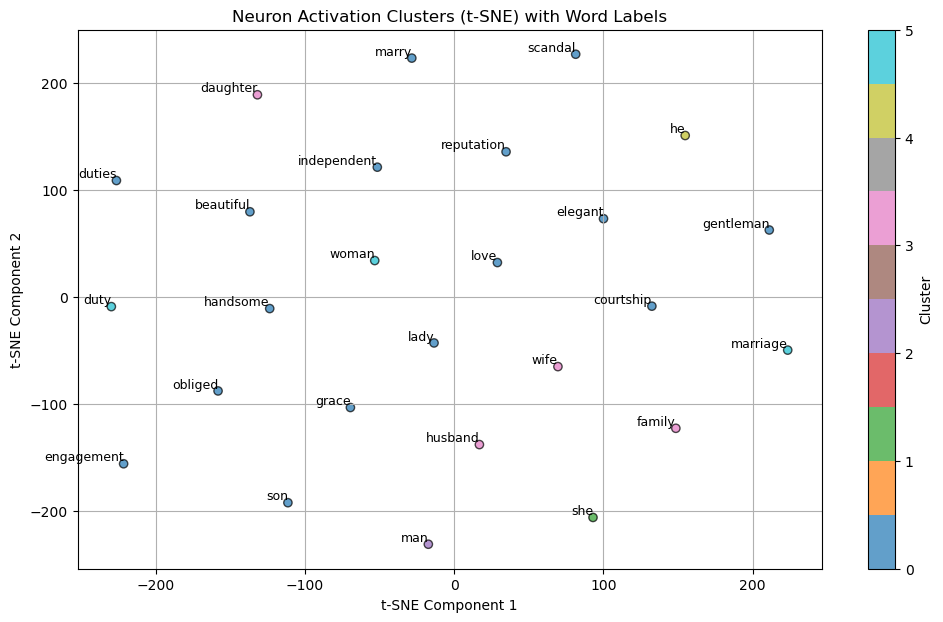

In [11]:
words = ["love", "courtship", "engagement", "marriage", "husband", "wife",
        "woman", "lady", "independent", "marry", "duty", "she", "daughter",
        "man", "gentleman", "he", "duties", "obliged", "family", "son",
        "handsome", "beautiful", "scandal",  "reputation", "elegant",
        "grace"]
visualize_clusters(words, tokenizer, model, sae_12, layer=12, num_clusters=6)


### Cluster Assignments ###

Cluster 0: ['courtship', 'woman', 'marry', 'man', 'gentleman', 'duties', 'obliged', 'son', 'reputation']

Cluster 1: ['engagement', 'wife', 'lady', 'independent', 'duty', 'handsome', 'beautiful', 'scandal', 'elegant', 'grace']

Cluster 2: ['husband', 'he']

Cluster 3: ['she', 'daughter', 'family']

Cluster 4: ['love', 'marriage']


/Users/mariam/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mariam/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


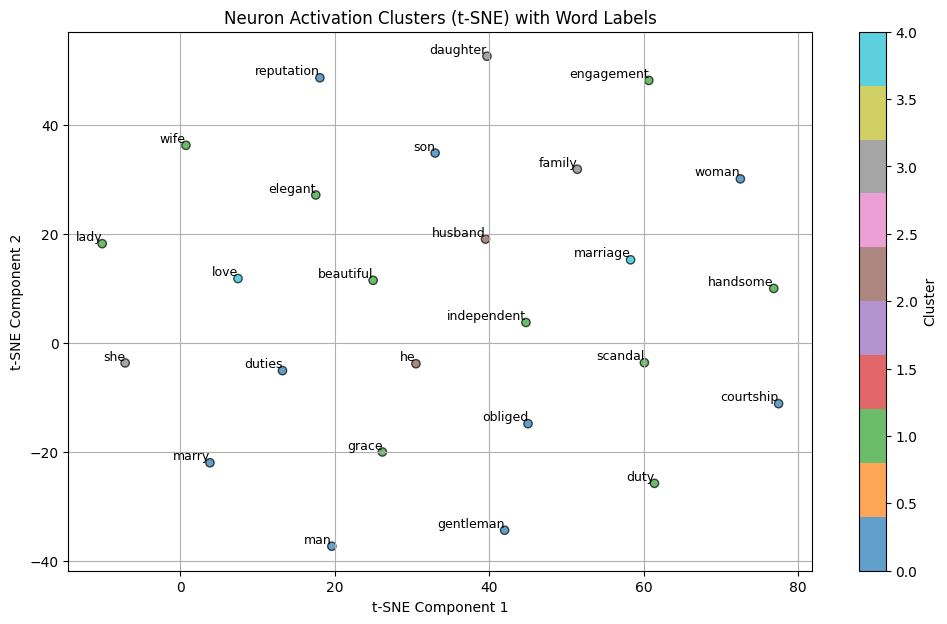

In [31]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

def visualize_clusters_3d(text_list, tokenizer, llm, sae, layer=6, num_clusters=10, pooling="mean"):
    activations = []
    
    for text in text_list:
        input_ids = text_to_token_ids(text, tokenizer)
        with torch.no_grad():
            _, hidden_states = model(input_ids, output_hidden_states=True)
            last_hidden_state = hidden_states[layer - 1].squeeze(0)
            
            _, latent_activations = sae(last_hidden_state)
            
            if pooling == "mean":
                latent_activations = latent_activations.mean(dim=0)
            elif pooling == "max":
                latent_activations = latent_activations.max(dim=0).values
            elif pooling == "sum":
                latent_activations = latent_activations.sum(dim=0)
            else:
                raise ValueError("Invalid pooling method. Choose 'mean', 'max', or 'sum'.")
        
        activations.append(latent_activations.detach().numpy().flatten())

    activations = np.array(activations)

    # Apply clustering
#     kmeans = KMeans(n_clusters=num_clusters, random_state=42)
#     labels = kmeans.fit_predict(activations)

    dbscan = DBSCAN(eps=0.5, min_samples=2)
    labels = dbscan.fit_predict(activations)
    
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=3)
    reduced_activations = pca.fit_transform(activations)

    # Plot 3D clusters
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(reduced_activations[:, 0], reduced_activations[:, 1], reduced_activations[:, 2], c=labels, cmap="tab10", alpha=0.7)
    ax.set_title("Neuron Activation Clusters (PCA 3D)")
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.set_zlabel("PCA Component 3")
    plt.colorbar(scatter, label="Cluster")
    plt.show()

words = ["love", "courtship", "engagement", "marriage", "husband", "wife",
        "woman", "lady", "independent", "marry", "duty", "she", "daughter",
        "man", "gentleman", "he", "duties", "obliged", "family", "son",
        "handsome", "beautiful", "scandal",  "reputation", "elegant",
        "grace"]
visualize_clusters(words, tokenizer, model, sae_6, layer=6, num_clusters=5)

In [38]:
import torch

def get_top_activated_words(sentence, model, tokenizer, sae, layer=6, top_k=5):
    """
    Finds the top K activated words in a sentence based on SAE activations.

    Args:
    - sentence (str): Input sentence.
    - model: LLM model.
    - tokenizer: Tokenizer used for the model.
    - sae: Trained Sparse Autoencoder.
    - layer (int): Layer to extract embeddings from.
    - top_k (int): Number of top activated words to return.

    Returns:
    - List of (word, activation_score) tuples sorted by activation.
    """
    
    # Get token embeddings from LLM (Extract from Layer 6 by default)
    token_embeddings = get_token_embeddings(sentence, model, tokenizer)[layer]
    test_tensor = torch.tensor(token_embeddings, dtype=torch.float32)

    # Encode using SAE
    _, encoded_repr = sae(test_tensor)  # Shape: (num_tokens, hidden_dim)

    # Compute activation scores for each token (sum of absolute values per token)
    token_activation_scores = encoded_repr.abs().sum(dim=1)  # Shape: (num_tokens,)

    # Get original tokens
    token_ids = tokenizer.encode(sentence)
    tokens = [tokenizer.decode([token_id]) for token_id in token_ids]

    # Find top K activated words
    top_k_max = min(top_k, len(token_activation_scores))
    top_indices = torch.topk(token_activation_scores, top_k_max).indices.tolist()
    top_words = [(tokens[i], token_activation_scores[i].item()) for i in top_indices]

    return top_words, token_activation_scores

In [39]:
sentence = "I am"
top_words, _ = get_top_activated_words(sentence, model, tokenizer, sae=sae_6)

print("Top Activated Words:", top_words)

Top Activated Words: [(' am', 0.16090859472751617), ('I', 0.12657766044139862)]


In [44]:
sentence = "Horses"
top_words, _ = get_top_activated_words(sentence, model, tokenizer, sae=sae_12)

print("Top Activated Words:", top_words)

Top Activated Words: [('orses', 5.243736267089844), ('H', 4.077714920043945)]


In [45]:
import torch

activations = get_top_activated_words(sentence, model, tokenizer, sae=sae_12)

# Get indices of top 5 most activated neurons
top_5_neurons = torch.topk(activations, 5)

print("Top 5 Most Activated Features (Neurons):", top_5_neurons.indices.tolist())
print("Activation Values:", top_5_neurons.values.tolist())

TypeError: topk(): argument 'input' (position 1) must be Tensor, not tuple

In [13]:
def analyze_bias(model, sae, tokenizer, sentences, layer=6, top_k=5, device="cpu"):
    model.to(device)
    sae.to(device)
    
    bias_analysis = {}
    
    for cat in list(sentences.keys()):
        for sentence in sentences[cat]:
            embeddings = torch.tensor(get_token_embeddings(sentence, model, tokenizer)[layer], dtype=torch.float32).to(device)

            _, encoded = sae(embeddings)

            activations = encoded.mean(dim=0).abs()

            # Get top activated features
            top_features = torch.topk(activations, top_k)
            
            if not cat in bias_analysis:
                bias_analysis[cat] = {}

            bias_analysis[cat][sentence] = {
                "top_neurons": top_features.indices.tolist(),
                "activation_values": top_features.values.tolist()
            }

    return bias_analysis

In [14]:
def visualize_categoriacal_activations(bias_analysis):
    activations = {}
    
    # Aggregate neuron activations per category
    for cat in bias_analysis.keys():
        for sentence, data in bias_analysis[cat].items():
            for neuron, activation in zip(data["top_neurons"], data["activation_values"]):
                if cat not in activations:
                    activations[cat] = {}
                activations[cat][neuron] = activations[cat].get(neuron, 0) + activation

    # Convert activations to sorted lists per category
    sorted_activations = {}
    for cat in activations.keys():
        sorted_activations[cat] = sorted(activations[cat].items(), key=lambda x: x[1], reverse=True)[:10]

    # Extract neurons and activation values for each category
    categories = list(sorted_activations.keys())
    neuron_sets = {cat: set([n for n, _ in sorted_activations[cat]]) for cat in categories}
    
    # Create a unified neuron list across all categories
    all_neurons = sorted(set().union(*neuron_sets.values()))
    
    # Prepare activation data for visualization
    activation_matrix = np.zeros((len(categories), len(all_neurons)))
    
    for i, cat in enumerate(categories):
        for neuron, value in sorted_activations[cat]:
            j = all_neurons.index(neuron)
            activation_matrix[i, j] = value

    # === Bar Plot: Top Activated Neurons per Category ===
    plt.figure(figsize=(12, 6))
    width = 0.15  # Adjust bar width
    x = np.arange(len(all_neurons))

    for i, cat in enumerate(categories):
        values = [activations[cat].get(neuron, 0) for neuron in all_neurons]
        plt.bar(x + i * width, values, width=width, label=cat, alpha=0.7)

    plt.xticks(x + width * (len(categories) - 1) / 2, all_neurons, rotation=45)
    plt.xlabel("Neuron Index")
    plt.ylabel("Total Activation Value")
    plt.title("Top Activated Neurons for Each Category")
    plt.legend()
    plt.show()

    # === Heatmap: Activation Patterns Across Categories ===
    plt.figure(figsize=(12, 6))
    sns.heatmap(activation_matrix, annot=True, xticklabels=all_neurons, yticklabels=categories, cmap="coolwarm")
    plt.xlabel("Neuron Index")
    plt.ylabel("Categories")
    plt.title("Neuron Activation Patterns Across Categories")
    plt.show()

In [17]:
def find_top_activating_words(text_list, tokenizer, model, sae, neuron_idx, layer=6, top_n=10, pooling="mean"):
    activations = []

    for text in text_list:
        input_ids = text_to_token_ids(text, tokenizer)
        with torch.no_grad():
            _, hidden_states = model(input_ids, output_hidden_states=True)
            last_hidden_state = hidden_states[layer - 1].squeeze(0)
            
            _, latent_activations = sae(last_hidden_state)
            
            # Apply pooling to handle variable-length tokenization
            if pooling == "mean":
                latent_activations = latent_activations.mean(dim=0)  # Average across tokens
            elif pooling == "max":
                latent_activations = latent_activations.max(dim=0).values  # Max across tokens
            elif pooling == "sum":
                latent_activations = latent_activations.sum(dim=0)  # Sum across tokens
            else:
                raise ValueError("Invalid pooling method. Choose 'mean', 'max', or 'sum'.")

        activation_value = latent_activations[neuron_idx].item()
        activations.append((text, activation_value))

    # Sort by highest activation
    activations.sort(key=lambda x: x[1], reverse=True)

    print(f"Top {top_n} words activating neuron {neuron_idx}:")
    for word, value in activations[:top_n]:
        print(f"{word}: {value:.4f}")


In [18]:
words = ["marriage", "work", "marry", "own", "he", "she", "husband", "wife", "family", "lady", "gentleman",
        "farm", "town", "London", "letter", "scandal", "love", "duty", "job", "title", "girl", "boy", 
        "horse", "rank", "people", "uncle", "aunt", "afternoon", "home"]
find_top_activating_words(words, tokenizer, model, sae_6, layer=6, neuron_idx=120)

Top 10 words activating neuron 120:
marriage: 0.0000
work: 0.0000
marry: 0.0000
own: 0.0000
he: 0.0000
she: 0.0000
husband: 0.0000
wife: 0.0000
family: 0.0000
lady: 0.0000


In [23]:
words = ["marriage", "work", "marry", "own", "owns", "he", "she", "husband", "wife", "family", "lady", "gentleman",
        "farm", "family", "town", "London", "letter", "scandal", "love", "duty", "she", "he"]
find_top_activating_words(words, tokenizer, model, sae_12, layer=12, neuron_idx=1559)

Top 10 words activating neuron 1559:
marriage: 0.0000
work: 0.0000
marry: 0.0000
own: 0.0000
owns: 0.0000
he: 0.0000
she: 0.0000
husband: 0.0000
wife: 0.0000
family: 0.0000


In [21]:
import matplotlib.pyplot as plt

def visualize_activations(input_text, tokenizer, model, sae, layer=6, pooling="mean"):
    # Tokenize input text
    input_ids = text_to_token_ids(input_text, tokenizer)
    
    # Get LLM hidden states
    with torch.no_grad():
        model.to("cpu")
        _, hidden_states = model(input_ids, output_hidden_states=True)
        last_hidden_state = hidden_states[layer - 1].squeeze(0)
    
        # Get SAE latent activations
        _, latent_activations = sae(last_hidden_state)

        # Apply pooling to handle variable-length tokenization
        if pooling == "mean":
            latent_activations = latent_activations.mean(dim=0)  # Average across tokens
        elif pooling == "max":
            latent_activations = latent_activations.max(dim=0).values  # Max across tokens
        elif pooling == "sum":
            latent_activations = latent_activations.sum(dim=0)  # Sum across tokens
        else:
            raise ValueError("Invalid pooling method. Choose 'mean', 'max', or 'sum'.")

    latent_activations = latent_activations.squeeze(0).detach().numpy()
    
    # Get top 10 activations
    top_10_indices = np.argsort(latent_activations)[-10:][::-1]
    top_10_values = latent_activations[top_10_indices]
    print("Top 10 activations:")
    for i, (idx, value) in enumerate(zip(top_10_indices, top_10_values)):
        print(f"{i+1}. Neuron {idx}: {value:.4f}")

    # Plot activations
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(latent_activations)), latent_activations)
    plt.xlabel('Neuron Index')
    plt.ylabel('Activation')
    plt.title(f'Latent Neuron Activations for Input: "{input_text}"')
    plt.show()
    
    return latent_activations

Top 10 activations:
1. Neuron 804: 14.1913
2. Neuron 2055: 10.2626
3. Neuron 639: 7.3423
4. Neuron 528: 6.0017
5. Neuron 443: 5.9819
6. Neuron 1553: 5.9729
7. Neuron 1526: 5.1954
8. Neuron 1557: 4.8075
9. Neuron 2919: 4.7999
10. Neuron 2064: 4.5592


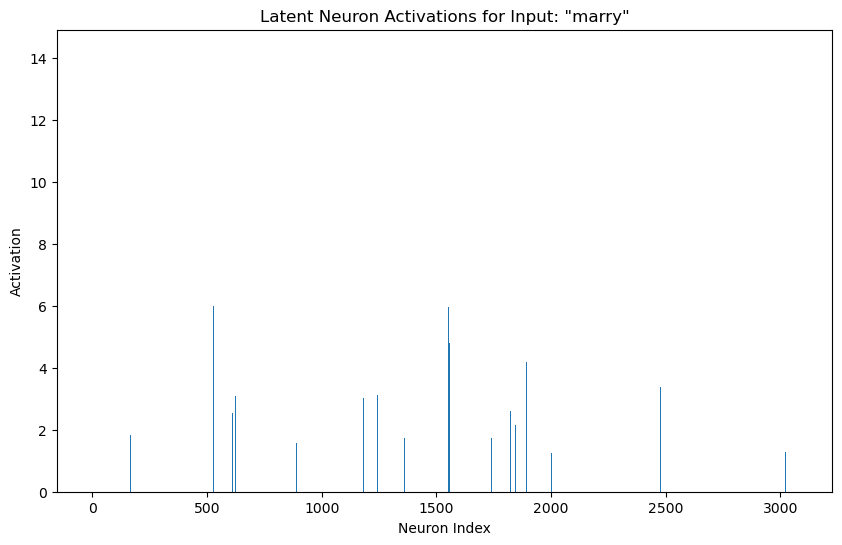

In [22]:
visualize_activations("marry", tokenizer,model, sae_6, layer=6, pooling="mean");